#### Zugriff aus python mit Hilfe von Pandas

In [210]:
import sqlite3 as sql
import pandas as pd
import torch
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib
import dateutil
import datetime

Baue eine Verbindung zur meiner Datenbank auf:

In [211]:
conn = sql.connect('/Users/cm/20190402/home-assistant_v2.db')

### Die Daten aus der SQL mit Hilfe von Pandas auslesen

Tabellennamen ermitteln

In [212]:
table_names = pd.read_sql_query('select name from sqlite_master where type = "table"', conn)
table_names

,name
0,events
1,recorder_runs
2,schema_changes
3,states


Tabelle events einlesen

In [213]:
events = pd.read_sql_query('select * from events', conn)

In [214]:
events.iloc[26013,:]

IndexError: single positional indexer is out-of-bounds

#### Tabelle recorder_runs einlesen

In [215]:
recorder_runs = pd.read_sql_query('select * from recorder_runs', conn)

In [216]:
recorder_runs.head()

,run_id,start,end,closed_incorrect,created
0,1,2019-03-14 20:25:23.434947,2019-03-14 20:30:46.775168,0,2019-03-14 20:25:26.805756
1,2,2019-03-14 20:30:58.627587,2019-03-14 20:34:30.843322,0,2019-03-14 20:31:01.310771
2,3,2019-03-14 20:34:43.543716,2019-03-14 20:37:48.007651,0,2019-03-14 20:34:46.236966
3,4,2019-03-14 20:37:59.974984,2019-03-14 20:42:23.147717,0,2019-03-14 20:38:02.612598
4,5,2019-03-14 20:42:35.949202,2019-03-14 20:59:04.860145,0,2019-03-14 20:42:38.634857


#### Tabelle schema_changes einlesen

In [217]:
schema_changes = pd.read_sql_query('select * from schema_changes', conn)

In [218]:
schema_changes.head()

,change_id,schema_version,changed
0,1,7,2019-03-14 20:25:26.737487


#### Tabelle states einlesen

In [219]:
states = pd.read_sql_query('select * from states', conn)

In [220]:
states.iloc[24922,:]

IndexError: single positional indexer is out-of-bounds

### Vertiefung der Datensuche in der states Tabelle entity sensor

In [221]:
sensor = states[states['entity_id'].str.contains('sensor')]

In [224]:
sensor.tail()

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
14140,28900,sensor,sensor.living_room_wt_current_temperature,21.3,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",31279,2019-04-02 18:18:11.027676,2019-04-02 18:18:11.027676,2019-04-02 18:18:11.102827,2a76ce436cde4672920a23edd2612ee5,None
14145,28905,sensor,sensor.living_room_wt_current_temperature,21.4,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",31284,2019-04-02 18:21:14.025753,2019-04-02 18:21:14.025753,2019-04-02 18:21:14.097561,4b7f21c235dc4df8a59f0245e2502b34,None
14148,28908,sensor,sensor.bath_wt_current_temperature,21.8,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",31287,2019-04-02 18:22:15.023023,2019-04-02 18:22:15.023023,2019-04-02 18:22:16.438913,b19af31eff42438a89b8faa038a9b8e0,None
14151,28911,sensor,sensor.sleeping_room_wt_mode,auto,"{""unit_of_measurement"": """", ""friendly_name"": ""...",31291,2019-04-02 18:23:17.512373,2019-04-02 18:23:17.512373,2019-04-02 18:23:17.592124,079aa999626c424382cfdc4cca1433ea,None
14154,28914,sensor,sensor.sleeping_room_ht_mode,auto,"{""unit_of_measurement"": """", ""friendly_name"": ""...",31297,2019-04-02 18:23:30.308576,2019-04-02 18:23:30.308576,2019-04-02 18:23:30.391024,f9754f3aabb44432ae9aefd080cf993a,None


In [225]:
state_sensor_living_room  = sensor[sensor['entity_id'].str.contains('living')]
state_sensor_living_room

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
6380,21140,sensor,sensor.living_room_wt_current_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22264,2019-03-25 19:57:44.973797,2019-03-25 19:57:44.973797,2019-03-25 19:57:52.070935,ce0fc3a423974300a3692d82d30655dc,None
6381,21141,sensor,sensor.living_room_wt_set_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22265,2019-03-25 19:57:44.974569,2019-03-25 19:57:44.974569,2019-03-25 19:57:52.136055,86d6f368cd094e108494d4086f90c220,None
6382,21142,sensor,sensor.living_room_wt_mode,unknown,"{""unit_of_measurement"": """", ""friendly_name"": ""...",22266,2019-03-25 19:57:44.975335,2019-03-25 19:57:44.975335,2019-03-25 19:57:52.200638,fe08497741454ef89601ce0c53f7518c,None
6383,21143,sensor,sensor.living_room_ht_south_current_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22267,2019-03-25 19:57:44.976205,2019-03-25 19:57:44.976205,2019-03-25 19:57:52.254811,aebbee5404cf4187bb0636b942519ed3,None
6384,21144,sensor,sensor.living_room_ht_south_set_temperature_bath,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22268,2019-03-25 19:57:44.977049,2019-03-25 19:57:44.977049,2019-03-25 19:57:52.315175,e598396b4caf420db8959e76cba927eb,None
6385,21145,sensor,sensor.living_room_ht_south_mode,unknown,"{""unit_of_measurement"": """", ""friendly_name"": ""...",22269,2019-03-25 19:57:44.977866,2019-03-25 19:57:44.977866,2019-03-25 19:57:52.376552,1198268b5e5e4f29b194fe06cf126691,None
6386,21146,sensor,sensor.living_room_ht_north_current_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22270,2019-03-25 19:57:44.978697,2019-03-25 19:57:44.978697,2019-03-25 19:57:52.435386,9f20634456b44ca1be6f8cbec30b0c4f,None
6387,21147,sensor,sensor.living_room_ht_north_set_temperature_bath,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22271,2019-03-25 19:57:44.979541,2019-03-25 19:57:44.979541,2019-03-25 19:57:52.484922,54fae313ec214491959b117a9b8040d9,None
6388,21148,sensor,sensor.living_room_ht_north_mode,unknown,"{""unit_of_measurement"": """", ""friendly_name"": ""...",22272,2019-03-25 19:57:44.980351,2019-03-25 19:57:44.980351,2019-03-25 19:57:52.548418,09e6f991d1a64fdfa4a4084584558e58,None
6420,21180,sensor,sensor.living_room_wt_current_temperature,20.3,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22337,2019-03-25 19:57:46.455667,2019-03-25 19:57:46.455667,2019-03-25 19:57:56.420053,bb15d6ccf39a409f9412be8b57570944,None


In [226]:
end_date = np.datetime64('2019-03-29 23:59:00')
start_date = np.datetime64('2019-03-26 00:00:00')

In [227]:
state_sensor_living_room_clean = state_sensor_living_room.loc[:,('entity_id','state','last_updated')]
state_sensor_living_room_clean = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('temperature')]
#state_sensor_living_room_clean = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('wt')]
living_room_wt_tcurr = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('current')]
living_room_wt_tset = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('set')]


In [228]:
living_room_wt_tcurr['last_updated'] = living_room_wt_tcurr['last_updated'].map(lambda x: dateutil.parser.parse(x))

/Users/cm/anaconda3/envs/week_program/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [229]:
living_room_wt_tset['last_updated'] = living_room_wt_tset['last_updated'].map(lambda x: dateutil.parser.parse(x))

/Users/cm/anaconda3/envs/week_program/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [230]:
living_room_wt_tcurr = living_room_wt_tcurr[(living_room_wt_tcurr['last_updated'] > start_date) & (living_room_wt_tcurr['last_updated'] < end_date)]
living_room_wt_tcurr['state'] = living_room_wt_tcurr['state'].astype(float)

In [231]:
living_room_wt_tset = living_room_wt_tset[(living_room_wt_tset['last_updated'] > start_date) & (living_room_wt_tset['last_updated'] < end_date)]
living_room_wt_tset['state'] = living_room_wt_tset['state'].astype(float)
living_room_wt_tset

,entity_id,state,last_updated
6982,sensor.living_room_ht_south_set_temperature_bath,20.0,2019-03-26 06:40:47.018251
6985,sensor.living_room_wt_set_temperature,20.0,2019-03-26 06:42:49.015884
6988,sensor.living_room_ht_north_set_temperature_bath,20.0,2019-03-26 06:42:49.047128
7120,sensor.living_room_wt_set_temperature,12.0,2019-03-26 08:46:47.023783
7124,sensor.living_room_wt_set_temperature,20.0,2019-03-26 08:49:50.022019
7805,sensor.living_room_ht_north_set_temperature_bath,18.5,2019-03-26 20:36:11.055977
7808,sensor.living_room_wt_set_temperature,18.5,2019-03-26 20:37:12.023466
7809,sensor.living_room_ht_south_set_temperature_bath,18.5,2019-03-26 20:37:12.040131
7866,sensor.living_room_ht_north_set_temperature_bath,17.0,2019-03-26 21:36:08.037722
7868,sensor.living_room_ht_south_set_temperature_bath,17.0,2019-03-26 21:37:09.023486


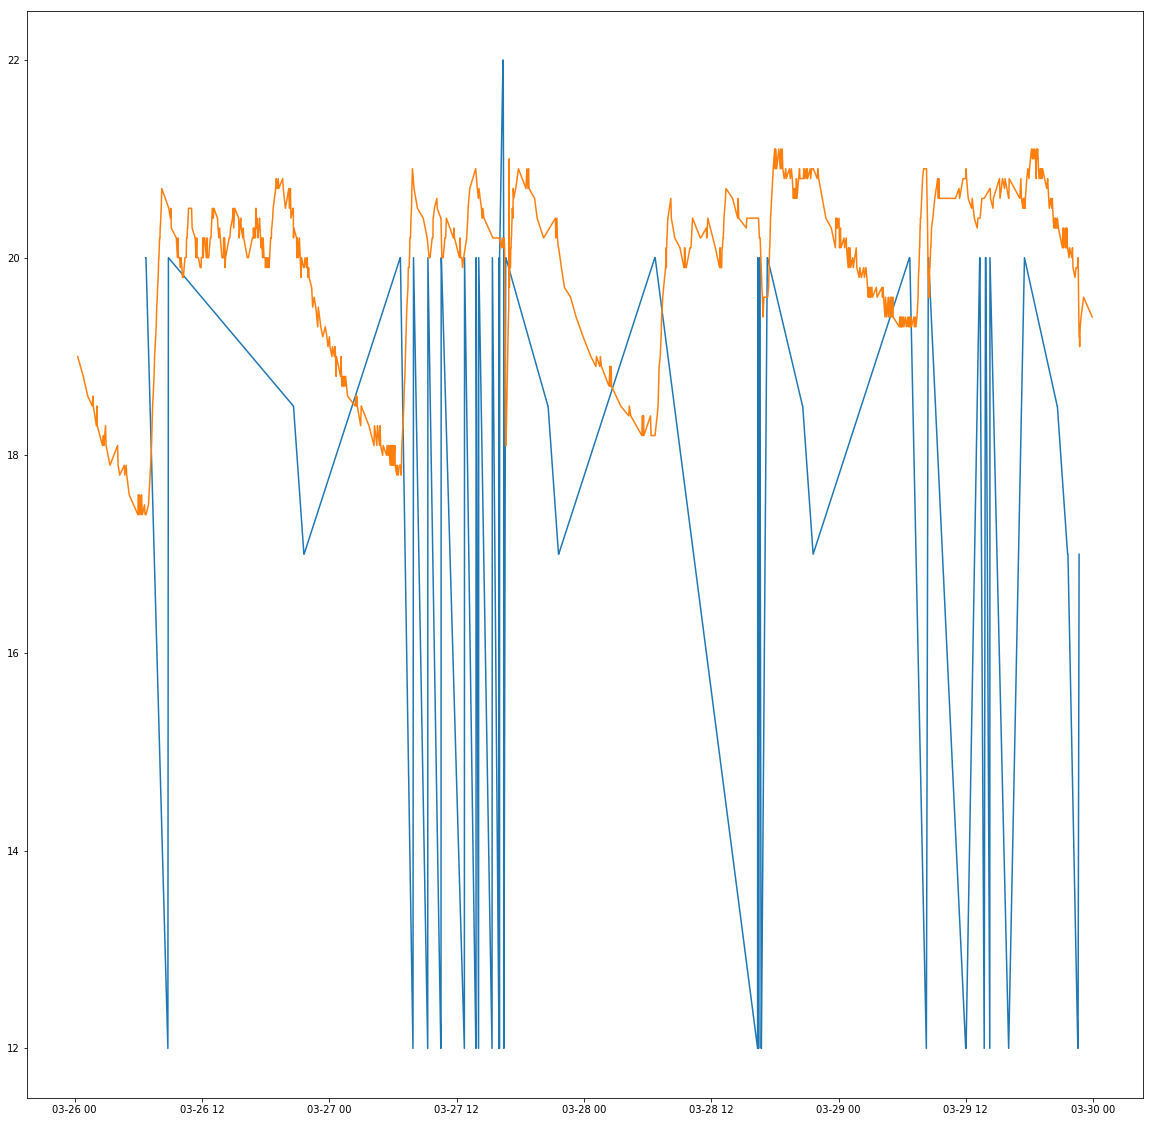

In [232]:
dates = matplotlib.dates.date2num(living_room_wt_tcurr['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,20])
dates2 = matplotlib.dates.date2num(living_room_wt_tset['last_updated'])
matplotlib.pyplot.plot_date(dates2, living_room_wt_tset['state'], '-')
matplotlib.pyplot.plot_date(dates, living_room_wt_tcurr['state'], '-');

In [233]:
end_date = np.datetime64('2019-04-01 23:59:00')
start_date = np.datetime64('2019-03-12 00:00:00')

In [234]:
pd.read_sql_query('SELECT entity_id, COUNT(*) as count FROM states GROUP BY entity_id', conn).head()

,entity_id,count
0,binary_sensor.bad_fensterkontakt_bad,5
1,binary_sensor.kuche_fensterkontakt_ku,5
2,binary_sensor.remote_ui,1
3,binary_sensor.schlafzimmer_fensterkontakt_sz,13
4,binary_sensor.wohnzimmer_fensterkontakt_nord,5


In [235]:
living_room_wt_tcurr = living_room_wt_tcurr[(living_room_wt_tcurr['last_updated'] > start_date) & (living_room_wt_tcurr['last_updated'] < end_date)]
living_room_wt_tcurr = living_room_wt_tcurr.sort_values(by=['state'])

### Vertiefung der Datensuche in der states Tabelle entity climate

In [249]:
climate = states[states['entity_id'].str.contains('climate')]

In [250]:
climate.head()

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
2,14762,climate,climate.kuche_wandthermostat_ku,manual,"{""current_temperature"": 17.1, ""min_temp"": 4.5,...",15333,2019-03-19 12:22:26.953017,2019-03-21 20:53:10.910853,2019-03-21 20:53:10.920476,db71971761af464eb7e1cf61ddacb389,None
8,14768,climate,climate.kuche_wandthermostat_ku,manual,"{""current_temperature"": 16.8, ""min_temp"": 4.5,...",15339,2019-03-19 12:22:26.953017,2019-03-21 20:58:15.903207,2019-03-21 20:58:15.923933,43546b1dcaa64b669b7083caa7125fbc,None
9,14769,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",15340,2019-03-19 12:22:26.931085,2019-03-21 20:58:15.919782,2019-03-21 20:58:15.995962,6e869e6a5c984d5c8c2ed07a8f1f54e5,None
15,14775,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",15346,2019-03-19 12:22:26.931085,2019-03-21 21:03:20.902970,2019-03-21 21:03:20.926720,bf3e9795fbea4caea87ef0d4459ff3be,None
16,14776,climate,climate.schlafzimmer_wandthermostat_sz,manual,"{""current_temperature"": 16.8, ""min_temp"": 4.5,...",15347,2019-03-19 12:22:26.960718,2019-03-21 21:03:20.929233,2019-03-21 21:03:20.990934,979dc5d2b49148eda7a09ff6ccee441d,None


In [251]:
state_climate_living_room  = climate[climate['entity_id'].str.contains('wohn')]
state_climate_living_room.head()

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
9,14769,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",15340,2019-03-19 12:22:26.931085,2019-03-21 20:58:15.919782,2019-03-21 20:58:15.995962,6e869e6a5c984d5c8c2ed07a8f1f54e5,None
15,14775,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",15346,2019-03-19 12:22:26.931085,2019-03-21 21:03:20.902970,2019-03-21 21:03:20.926720,bf3e9795fbea4caea87ef0d4459ff3be,None
31,14791,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",15362,2019-03-19 12:22:26.931085,2019-03-21 21:13:30.925355,2019-03-21 21:13:30.997991,b8c40f8bfe354046bc87431777b1591d,None
38,14798,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",15369,2019-03-19 12:22:26.931085,2019-03-21 21:18:33.946381,2019-03-21 21:18:34.010383,07d48f639a584c80b3307d86a7ff2f76,None
44,14804,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",15375,2019-03-19 12:22:26.931085,2019-03-21 21:23:40.920109,2019-03-21 21:23:40.946036,14995254fe014e53b1fa5c045532283e,None


In [252]:
state_climate_living_room = state_climate_living_room.loc[:,('entity_id','state','attributes','last_updated')]
state_climate_living_room.tail()

,entity_id,state,attributes,last_updated
14101,climate.wohnzimmer_thermostat_wz_nord,auto,"{""current_temperature"": 0.0, ""min_temp"": 4.5, ...",2019-04-02 18:15:08.150175
14102,climate.wohnzimmer_thermostat_wz_sud,auto,"{""current_temperature"": 0.0, ""min_temp"": 4.5, ...",2019-04-02 18:15:08.151811
14106,climate.wohnzimmer_wandthermostat_wz,auto,"{""current_temperature"": 21.2, ""min_temp"": 4.5,...",2019-04-02 18:15:08.158242
14139,climate.wohnzimmer_wandthermostat_wz,auto,"{""current_temperature"": 21.3, ""min_temp"": 4.5,...",2019-04-02 18:18:11.019056
14144,climate.wohnzimmer_wandthermostat_wz,auto,"{""current_temperature"": 21.4, ""min_temp"": 4.5,...",2019-04-02 18:21:14.018370


In [253]:
state_climate_living_room['last_updated'] = state_climate_living_room['last_updated'].map(lambda x: dateutil.parser.parse(x))

In [254]:
state_climate_living_room = state_climate_living_room[(state_climate_living_room['last_updated'] > start_date)]

In [255]:
current_temp = []
set_temp = []
for value in state_climate_living_room['attributes']:
    json_acceptable_string = value.replace("'", "\"")
    dict = json.loads(json_acceptable_string)
    current_temp.append(dict['current_temperature'])
    set_temp.append(dict['temperature'])

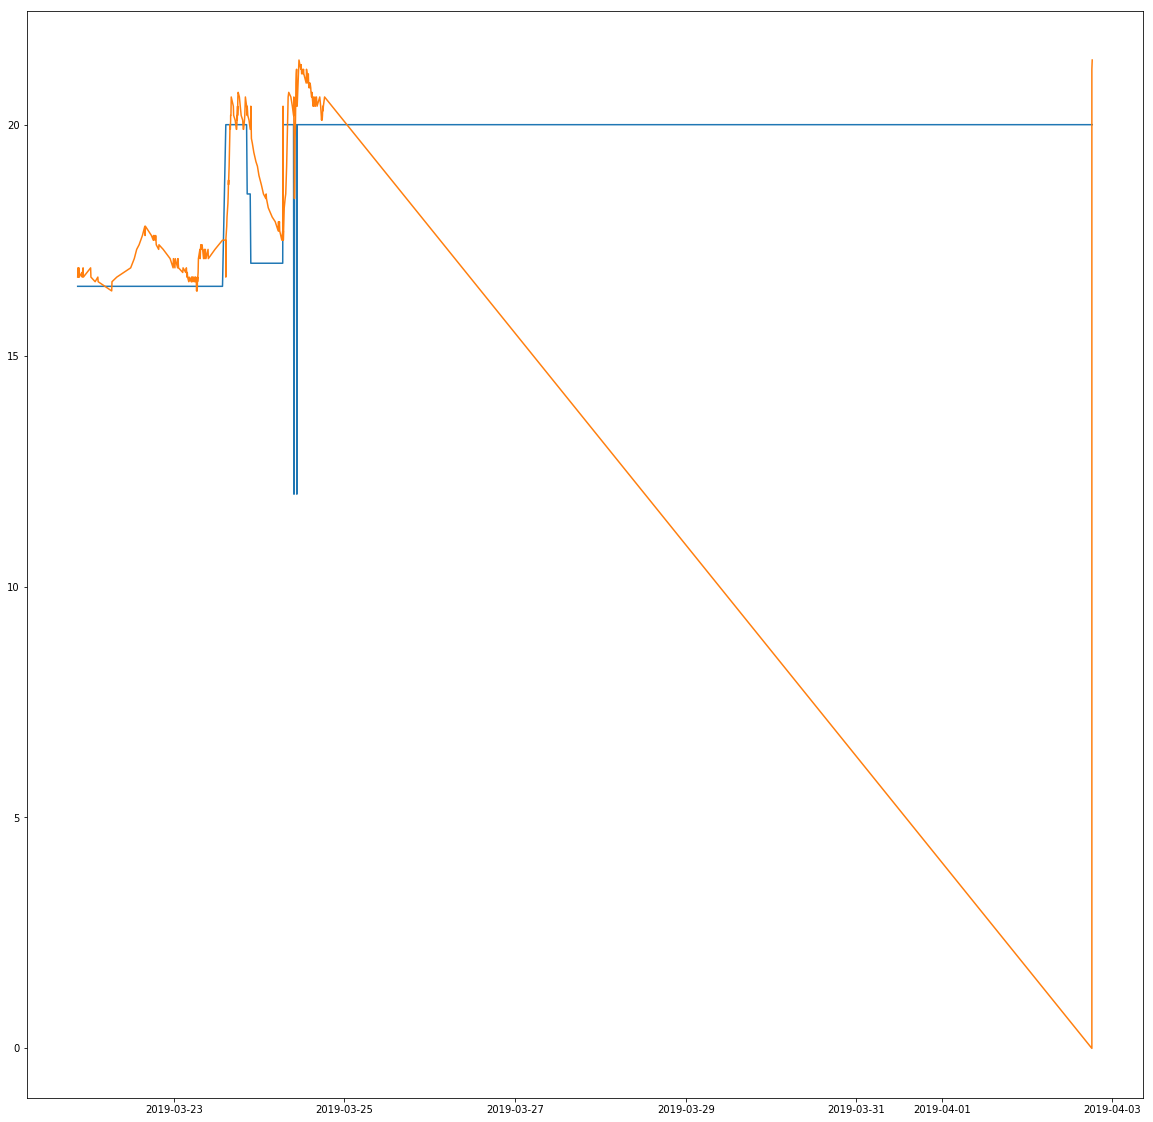

In [256]:
dates = matplotlib.dates.date2num(state_climate_living_room['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.plot_date(dates, set_temp, '-')
matplotlib.pyplot.plot_date(dates, current_temp, '-');

In [248]:
pd.read_sql_query('select entity_id,state,attributes,last_updated from states where entity_id like "%climate%wohn%wand%"', conn)

,entity_id,state,attributes,last_updated
0,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",2019-03-21 20:58:15.919782
1,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",2019-03-21 21:03:20.902970
2,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",2019-03-21 21:13:30.925355
3,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",2019-03-21 21:18:33.946381
4,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",2019-03-21 21:23:40.920109
5,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.8, ""min_temp"": 4.5,...",2019-03-21 22:09:24.881308
6,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",2019-03-21 22:14:28.873702
7,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",2019-03-21 22:29:43.888221
8,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",2019-03-21 22:34:48.892795
9,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.9, ""min_temp"": 4.5,...",2019-03-22 00:36:43.901250
